# Sorting Algorithms

## 1. Bubble Sort 

The class began by learning how to define functions in Python and how to pick out elements of an array to create ```swap```. Bubble Sort was then a double loop working through the array, sorting pairs, up to $n$ (list length) times.

In [3]:
def swap( A, x, y ):
    tmp = A[x]
    A[x] = A[y]
    A[y] = tmp

def bubblesort(A):
    for i in range( len( A ) ):
        for k in range( len( A ) - 1, i, -1 ):
            if ( A[k] < A[k - 1] ):
                swap( A, k, k - 1 )
    return A

## 2. Quick Sort

The challenge here, where Quick Sort takes the middle element as a pivot and creates two subsets was to make sure that a single pass, ```quicksortsingle``` always returned three lists. Python's clever ability to define functions recursively completed the definition (we built up to this by first defining $n!$ in this way).

In [4]:
def quicksortsingle(A):
    if len(A) >= 1:
        pivot = A[len(A)/2]  #select middle object, automatically takes floor
        #print(pivot)
        
        small = []
        big = []
        
        #print(A)
        A.remove(pivot)
        #print(A)
        
        for i in A:
            if i <= pivot:
                small.append(i)
            else:
                big.append(i)
            #print(small,pivot,big)
        return(small, [pivot], big)
    if len(A) == 0:
        return([],[],[])

def qs(A):
    if len(A) <= 1:
        return A
    else:
        (small,pivot,big) = quicksortsingle(A)
        return qs(small)+qs(pivot)+qs(big)

## 3. Built-in Sort

Embedded in the language already is a version of Timsort, a hybrid sorting algorithm, derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data. It was invented by Tim Peters in 2002 for use in the Python programming language. The algorithm finds subsets of the data that are already ordered, and uses the subsets to sort the data more efficiently. This is done by merging an identified subset, called a run, with existing runs until certain criteria are fulfilled.

IT is accessed using the ```sorted(list)``` command.

## 4. Examples

In [5]:
X = [2,6,3,4,8,1,12]

print(X)
print(sorted(X))
print(bubblesort(X))
print(qs(X))


[2, 6, 3, 4, 8, 1, 12]
[1, 2, 3, 4, 6, 8, 12]
[1, 2, 3, 4, 6, 8, 12]
[1, 2, 3, 4, 6, 8, 12]


## 5. Timings and Complexity

Our next goal was to explore the complexity of algorithms by measuring the time taken, and the factors by which that changed as the list length increased. 

The class was shocked that different computers with different processors and memory varied so much in terms of performance!

We began by importing the ```timeit``` module and learning how to take intermediate timings from it.

In [6]:
from timeit import default_timer as timer

start = timer()
print("Hello, world!")
end = timer()
print(end - start)  

Hello, world!
0.000502909222553


Next, we measured the timings for sorting a short hand written list.

In [3]:
X = [2,6,3,4,8,1,12]

from timeit import default_timer as timer

start = timer()
sorted(X)
inta = timer()
bubblesort(X)
intb = timer()
qs(X)
end = timer()

print("Built in Sorted took", inta-start)

print("Bubblesort took", intb-inta)

print("Quicksort took", end-intb)

[1, 2, 3, 4, 6, 8, 12]
[2, 6, 3, 4, 8, 1, 12]
[1, 2, 3, 4, 6, 8, 12]
[1, 2, 3, 4, 6, 8, 12]
[1, 2, 3, 4, 6, 8, 12]
[1, 2, 3, 6, 8, 12]
('Built in Sorted took', 9.112838714570026e-05)
('Bubblesort took', 9.112838714575577e-05)
('Quicksort took', 9.361653423500815e-05)


The relative speeds are not yet showing up, and are too dependent on luck for such a short list. We repeated the experiment with a list of length $100$.

In [8]:
import random
X = random.sample(range(1000), 100)

from timeit import default_timer as timer

start = timer()
sorted(X)
inta = timer()
bubblesort(X)
intb = timer()
qs(X)
end = timer()

print("Built in Sorted took", inta-start)

print("Bubblesort took", intb-inta)

print("Quicksort took", end-intb)

('Built in Sorted took', 0.0002531651868480367)
('Bubblesort took', 0.004138037851618037)
('Quicksort took', 0.0007769123302239223)


The order is now as we would expect, but luck when picking a single list of length 100 could throw off the stats. We built up a function which measures speed over $r$ repetitions and takes the average. Note that following a neat suggestion from one of my students we decided not to store all the timing values, but instead a running total which allowed us to calculate the average at the end.

In [9]:
import random

def bstime(n): # n is size of list
    r = 10 #repetitions
    i = 0
    total = 0

    while i<r:
        X = random.sample(range(1000),n)
        start = timer()
        bubblesort(X)
        end = timer()
        total = total + (end-start)
        i += 1
    time = total/r
    return time

## 6. Graphing

Although this method now sorted the algorithms it only gave a snapshot of how each was behaving. We discuss implementing the ```bstime()``` function across a range of values and plotting the results. This gave the class an opportunity to learn about ```matplotlib```, and the important magic function ```%matplotlib inline``` which keeps the output within the Jupyter notebook.

I stepped over list lengths from 1 to 499 and created a list of the corresponding average timings.

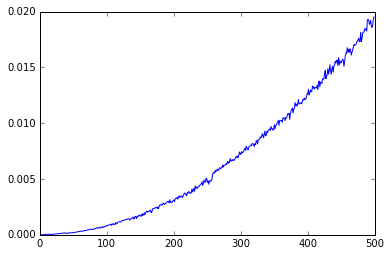

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=[]
y=[]

n = 1
while n<500:
    x.append(n)
    y.append(bstime(n))
    n = n+1

    
plt.plot(x,y)

This appears to be a quadratic curve, $O(n^2)$, as suggested by theory, but fitting quadratics is hard. Instead we studies the $log-log$ graph, where a linear model of gradient of $2$ would confirm a good model by a single quadratic.

We began by creating new $log$ lists, ```a``` and ```b```, and then plotting the result.

In [16]:
a = np.log(x)
b = np.log(y)

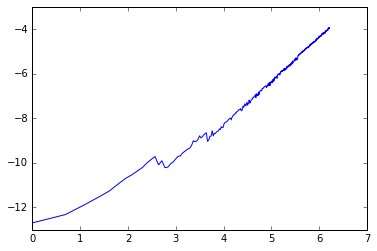

In [18]:
plt.plot(a,b)

This looks to be a fairly good line graph, but relatively few points in the 0-4 ```a```-range create noise. We can calculate the gradient of line of best fit as follows. 

In [19]:
slope, intercept = np.polyfit(a, b , 1)
print(slope)

1.73429200491


It makes sense that the graph is less stable for small values, when the linear "error term" is more significant relative to $n^2$, thus if we are only interesting in picking out the largest power (as the gradient of $log-log$ graph) it is justified to ignore small values, in this case when log(list-length) $<4$, list-length $<60$.

In [26]:
c = a[60:]
d = b[60:]

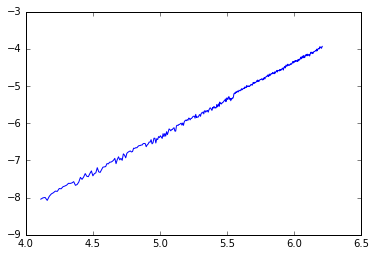

In [30]:
plt.plot(c,d)

This now appears to be an excellent fit (which we could confirm using PMCC).

In [28]:
slope, intercept = np.polyfit(c, d , 1)
print(slope)

1.97713881883


After the noise at the start, the log-log graph, log time vs log list length settles down to have gradient two, hence complexity of Bubble Sort is $O(n^2)$ where $n = $ list length.